In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA


In [24]:
data = pd.read_csv('./heart.csv')

data.dropna(inplace=True)

In [25]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [26]:
data.isnull().sum()*100/len(data)

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

<Axes: >

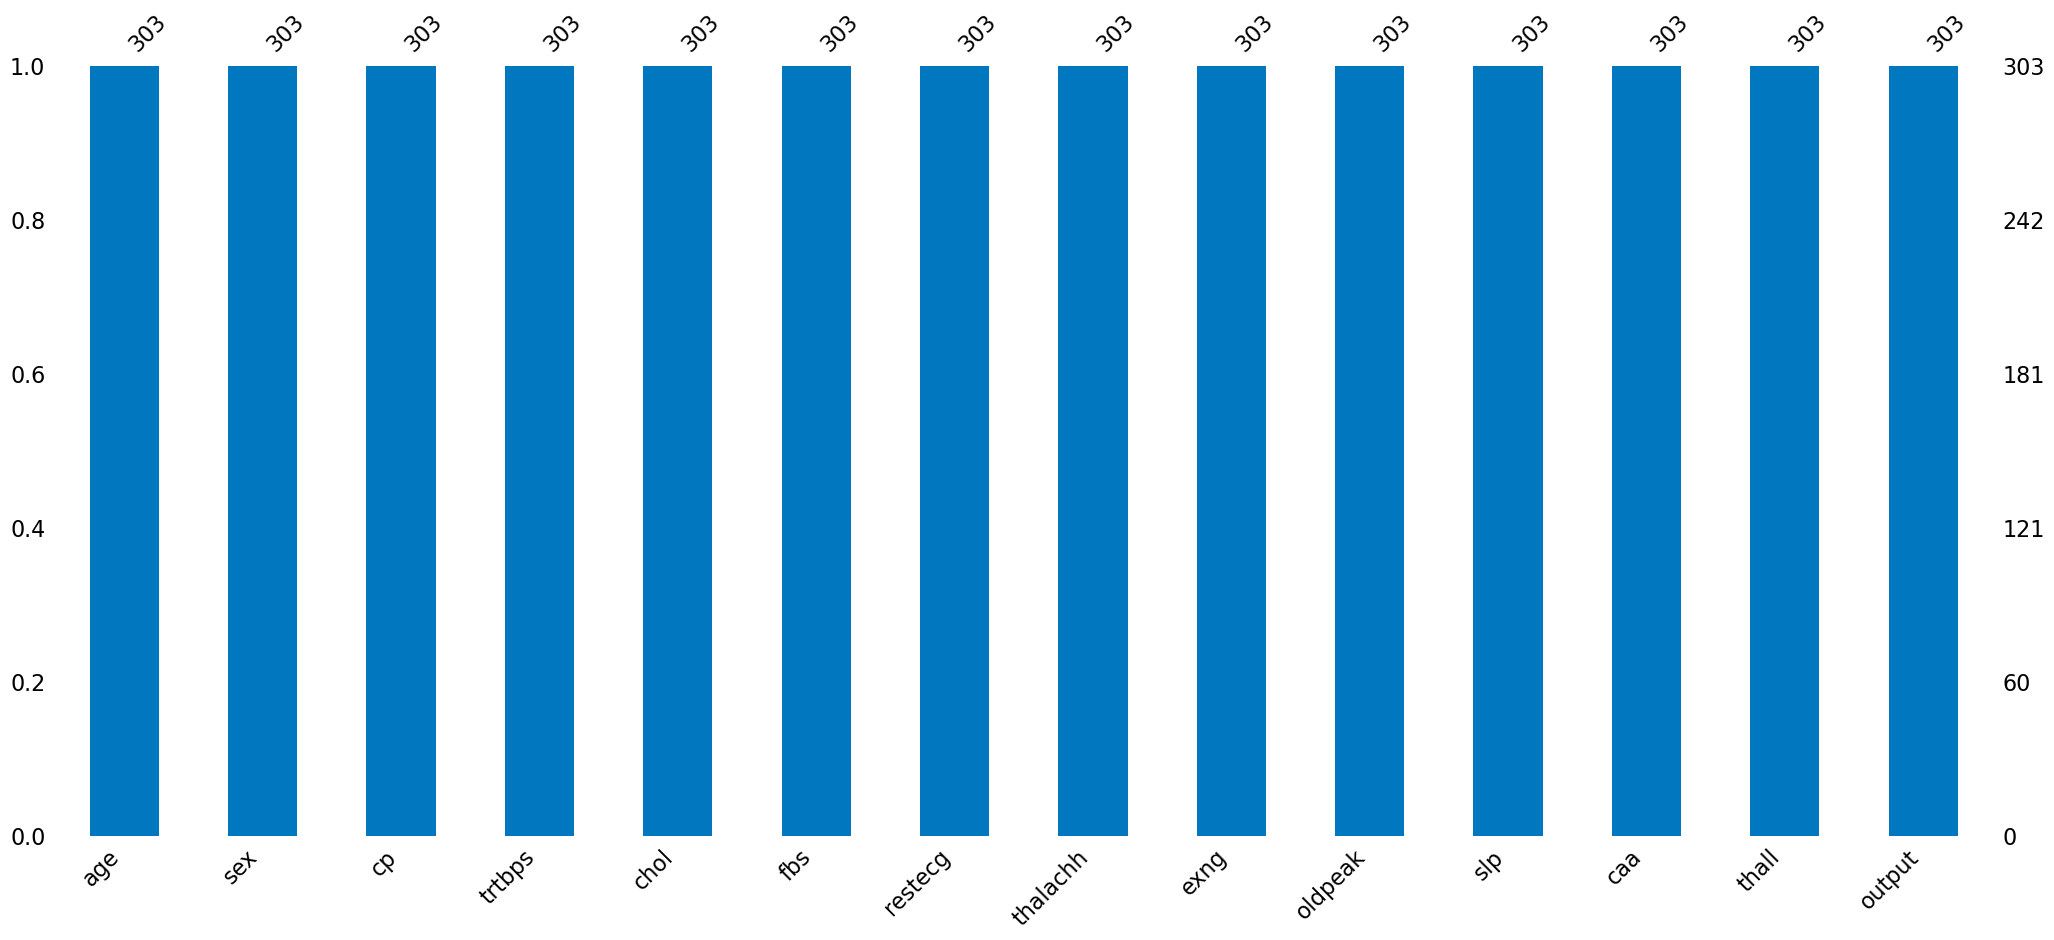

In [27]:
msno.bar(data, color="#0077be")

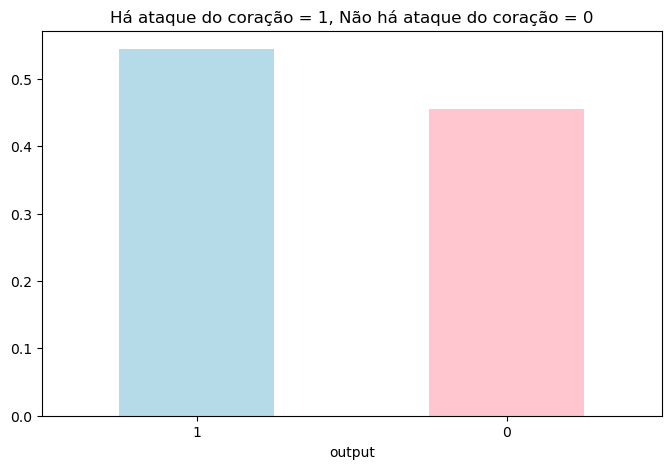

In [28]:
fig = plt.figure(figsize = (8,5))
data.output.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','pink'], alpha = 0.9, rot=0)
plt.title('Há ataque do coração = 1, Não há ataque do coração = 0')
plt.show()

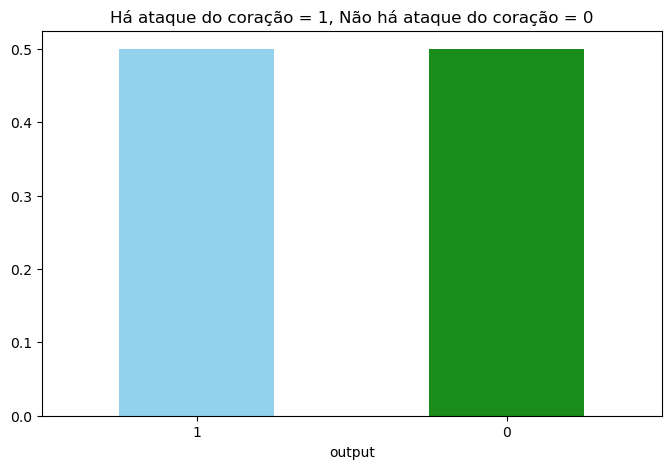

In [29]:
no = data[data.output == 0]
yes = data[data.output == 1]
no_oversampled = resample(no, replace=True, n_samples=len(yes), random_state=123)
oversampled = pd.concat([yes, no_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.output.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','green'], alpha = 0.9, rot=0)
plt.title('Há ataque do coração = 1, Não há ataque do coração = 0')
plt.show()

In [30]:
x = data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
y = data['output']

X = oversampled.drop(["output"], axis=1)
Y = oversampled["output"]

In [31]:
print(X)
len(X)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
289   55    0   0     128   205    0        2       130     1      2.0    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   
193   60    1   0     145   282    0        0       142     1      2.8    1   
231   57    1   0     165   289    1        0       124     0      1.0    1   
175   40    1   0     110   167    0        0       114     1      2.0    1   

     caa  thall  
0      0      1  
1      0      2

330

In [54]:
print(y)
len(y)
len(x)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


303

In [33]:
X.mean(axis=0)

age          54.724242
sex           0.687879
cp            0.924242
trtbps      131.221212
chol        246.639394
fbs           0.148485
restecg       0.560606
thalachh    148.084848
exng          0.339394
oldpeak       1.106061
slp           1.342424
caa           0.775758
thall         2.312121
dtype: float64

In [34]:
x.mean(axis=0)

age          54.366337
sex           0.683168
cp            0.966997
trtbps      131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalachh    149.646865
exng          0.326733
oldpeak       1.039604
slp           1.399340
caa           0.729373
thall         2.313531
dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
print(len(x_train_new))
print(len(x_test_new))
print(len(X_train))
print(len(X_test))
print(len(X_train)/len(X))

242
61
264
66
0.8


In [37]:
pca = PCA(n_components=0.89)
pca.fit(x)

PCA(n_components=0.89)

In [38]:
Z = pca.transform(x)
Z

array([[-1.22673448e+01,  2.87383781e+00],
       [ 2.69013712e+00, -3.98713736e+01],
       [-4.29502141e+01, -2.36368199e+01],
       [-1.09447564e+01, -2.84380358e+01],
       [ 1.06979053e+02, -1.58744678e+01],
       [-5.36472038e+01,  4.00392377e+00],
       [ 4.80821551e+01, -3.03896086e+00],
       [ 1.55660590e+01, -2.62745637e+01],
       [-4.54388962e+01, -7.42977739e+00],
       [-7.73163161e+01, -1.99100759e+01],
       [-6.94323738e+00, -9.17536374e+00],
       [ 2.84259379e+01,  8.47126467e+00],
       [ 1.92477377e+01, -2.24212575e+01],
       [-3.58055558e+01,  5.70343964e+00],
       [ 3.75886896e+01, -1.02579437e+01],
       [-2.79998518e+01, -9.64570379e+00],
       [ 9.29750393e+01, -2.42584272e+01],
       [-1.86307973e+01,  3.92597411e+01],
       [ 1.00245407e+00, -2.10404091e+01],
       [-6.28419048e+00,  2.34469473e+00],
       [-1.19811457e+01, -9.66308502e+00],
       [-1.39453649e+01, -3.05172542e+01],
       [-2.05255102e+01, -2.87200024e+01],
       [-2.

In [39]:
Z.mean(axis=0)

array([-4.45554851e-15,  1.31438681e-14])

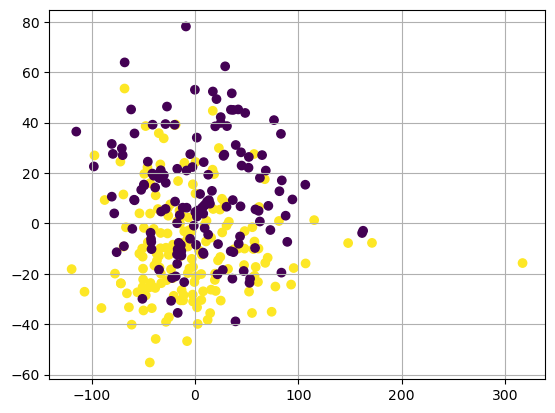

In [40]:
plt.scatter(Z[:,0],Z[:,1],c=y)
plt.grid()

In [41]:
Z_train, Z_test, yz_train, yz_test = train_test_split(Z, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

scaler = StandardScaler()
x_train_standard_new = scaler.fit_transform(x_train_new)
x_test_standard_new = scaler.transform(x_test_new)

scaler = StandardScaler()
x_train_standard_z = scaler.fit_transform(Z_train)
x_test_standard_z = scaler.transform(Z_test)

In [43]:
model_1 = LogisticRegression()
model_1.fit(x_train_standard, y_train)
y_pred_1 = model_1.predict(x_test_standard_new)
y_pred_1t = model_1.predict(x_train_standard_new)

model_2 = LinearSVC(C=1, loss = 'hinge', max_iter=10000)
model_2.fit(x_train_standard, y_train)  
y_pred_2 = model_2.predict(x_test_standard_new)
y_pred_2t = model_2.predict(x_train_standard_new)

model_3 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter= 100))),).fit(x_train_standard, y_train)
y_pred_3 = model_3.predict(x_test_standard_new)
y_pred_3t = model_3.predict(x_train_standard_new)

model_4 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("poli_SVM", (LinearSVC(C=1, max_iter=50000)))),).fit(x_train_standard, y_train)
y_pred_4 = model_4.predict(x_test_standard_new)
y_pred_4t = model_4.predict(x_train_standard_new)

model_5 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter= 1000))),).fit(x_train_standard_z, yz_train)
y_pred_5 = model_5.predict(x_test_standard_z)
y_pred_5t = model_5.predict(x_train_standard_z)

c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


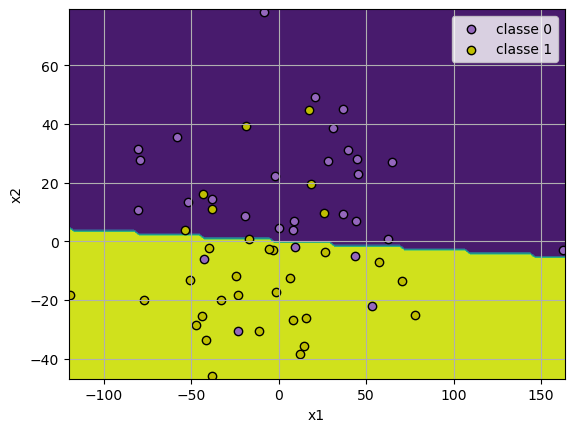

In [44]:
disp_1 = DecisionBoundaryDisplay.from_estimator(model_5,Z_test,response_method="predict",alpha=1)
disp_1.ax_.scatter(Z_test[yz_test==0,0],Z_test[yz_test==0,1],c='tab:purple',label="classe 0",edgecolor="k")
disp_1.ax_.scatter(Z_test[yz_test==1,0],Z_test[yz_test==1,1],c='y',label="classe 1",edgecolor="k")
disp_1.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_1.ax_.grid()


Confusion Matrix:
[[26  3]
 [ 9 23]]
Accuracy: 80.33%


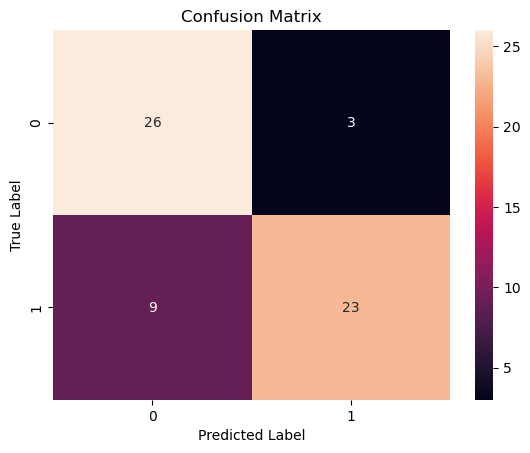

In [45]:
cm = confusion_matrix(y_test_new, y_pred_1)
acc_reg_test = accuracy_score(y_test_new, y_pred_1)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[26  3]
 [ 8 24]]
Accuracy: 81.97%


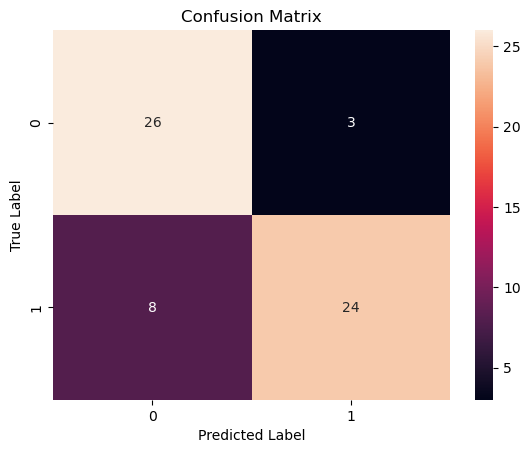

In [46]:
cm = confusion_matrix(y_test_new, y_pred_2)
acc_reg_test = accuracy_score(y_test_new, y_pred_2)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[27  2]
 [ 4 28]]
Accuracy: 90.16%


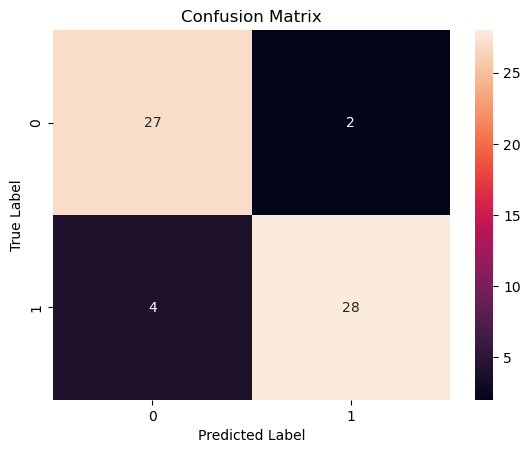

In [47]:
cm = confusion_matrix(y_test_new, y_pred_3)
acc_reg_test = accuracy_score(y_test_new, y_pred_3)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[28  1]
 [ 3 29]]
Accuracy: 93.44%


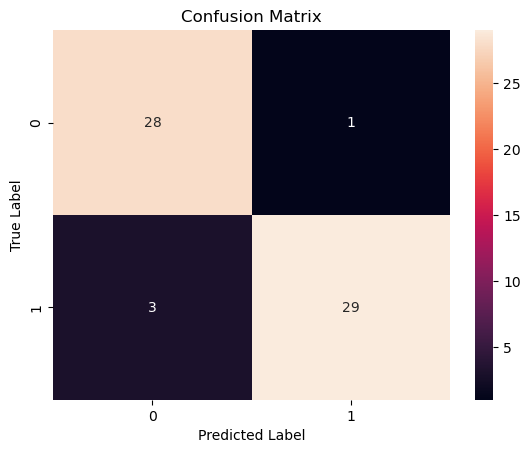

In [48]:
cm = confusion_matrix(y_test_new, y_pred_4)
acc_reg_test = accuracy_score(y_test_new, y_pred_4)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

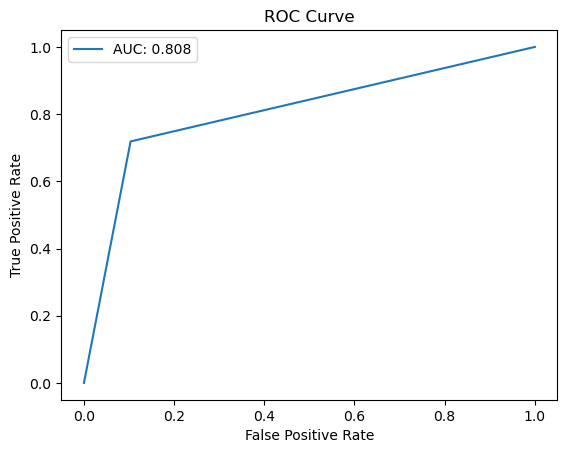

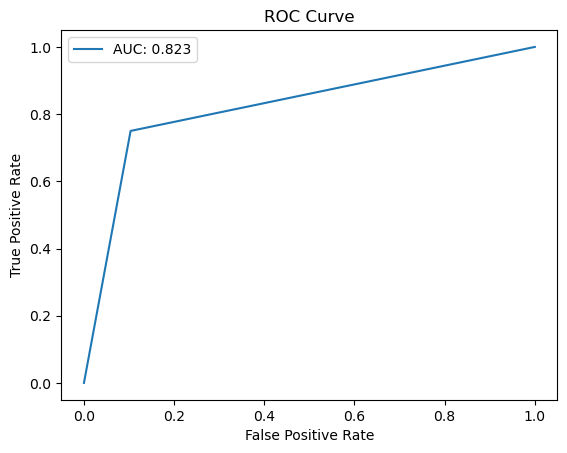

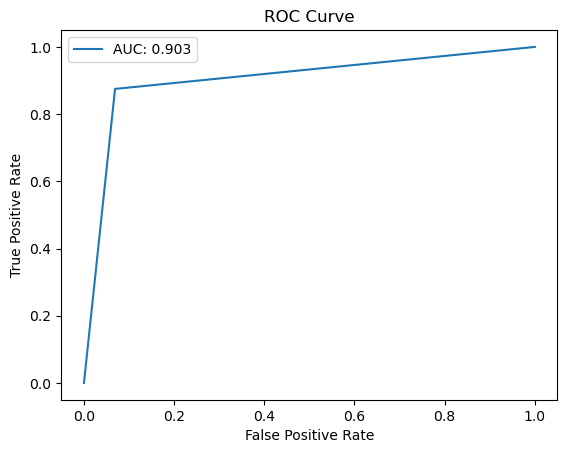

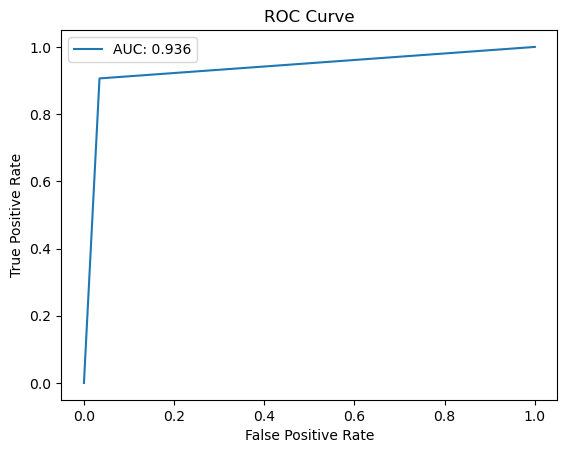

In [64]:
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_1)
auc = roc_auc_score(y_test_new, y_pred_1)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_2)
auc = roc_auc_score(y_test_new, y_pred_2)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_3)
auc = roc_auc_score(y_test_new, y_pred_3)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_4)
auc = roc_auc_score(y_test_new, y_pred_4)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [50]:
accuracy = accuracy_score(y_test_new, y_pred_1)
accuracy_0 = accuracy_score(y_train_new, y_pred_1t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(y_test_new, y_pred_1)
report_0 = classification_report(y_train_new, y_pred_1t)
print(report)
print(report_0)

Accuracy: 0.8032786885245902
Accuracy: 0.8388429752066116
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       109
           1       0.88      0.82      0.85       133

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [51]:
accuracy = accuracy_score(y_test_new, y_pred_2)
accuracy_0 = accuracy_score(y_train_new, y_pred_2t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(y_test_new, y_pred_2)
report_0 = classification_report(y_train_new, y_pred_2t)
print(report)
print(report_0)

Accuracy: 0.819672131147541
Accuracy: 0.8553719008264463
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.86      0.88      0.87       133

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



In [52]:
accuracy = accuracy_score(y_test_new, y_pred_3)
accuracy_0 = accuracy_score(y_train_new, y_pred_3t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(y_test_new, y_pred_3)
report_0 = classification_report(y_train_new, y_pred_3t)
print(report)
print(report_0)

Accuracy: 0.9016393442622951
Accuracy: 0.9628099173553719
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       109
           1       0.94      0.99      0.97       133

    accuracy                           0.96       242
   macro avg       0.97      0.96      0.96       242
weighted avg       0.96      0.96      0.96       242



In [53]:
accuracy = accuracy_score(y_test_new, y_pred_4)
accuracy_0 = accuracy_score(y_train_new, y_pred_4t)
print(f'Accuracy: {accuracy}')
print(f'Accuracy: {accuracy_0}')


report = classification_report(y_test_new, y_pred_4)
report_0 = classification_report(y_train_new, y_pred_4t)
print(report)
print(report_0)


Accuracy: 0.9344262295081968
Accuracy: 0.9586776859504132
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       109
           1       0.94      0.99      0.96       133

    accuracy                           0.96       242
   macro avg       0.96      0.95      0.96       242
weighted avg       0.96      0.96      0.96       242

